# Mod 5: Technical Notebook

In [1]:
import os
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import sklearn.preprocessing as PP
import imblearn.pipeline as PL
import sklearn.model_selection as MS
import imblearn.under_sampling as US
import imblearn.over_sampling as OS

import sklearn.linear_model as LM
import sklearn.tree as TR
import sklearn.ensemble as ES 
import sklearn.metrics as MT     

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using TensorFlow backend.


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%load_ext autoreload
%autoreload 2         # reload custom py file eveytime a new cell is run

import lego_helper as lh

## 1.1 Scrape Sets' URL

File: ```brickset_set_url.ipynb```

Goal: Get the set url for every set on the brickset website. Traverse the website by year.   

Result: Set url data is output to the file ```brickset_set_url.csv```.   

In [4]:
set_ls = lh.get_year('1990')
set_ls[:2]

year: 1990
last page: 6


[{'set_no': '260', 'name': 'Idea Book', 'url': '/sets/260-1/Idea-Book'},
 {'set_no': '315',
  'name': 'Basic Building Set, 3+',
  'url': '/sets/315-1/Basic-Building-Set-3'}]

In [5]:
set_df = pd.DataFrame(set_ls)
set_df = set_df[['set_no', 'name', 'url']]
set_df.head()
set_df.info()

,set_no,name,url
0,260,Idea Book,/sets/260-1/Idea-Book
1,315,"Basic Building Set, 3+",/sets/315-1/Basic-Building-Set-3
2,325,"Basic Building Set, 3+",/sets/325-1/Basic-Building-Set-3
3,335,"Basic Building Set, 3+",/sets/335-1/Basic-Building-Set-3
4,365,"Basic Building Set, 3+",/sets/365-2/Basic-Building-Set-3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
set_no    126 non-null object
name      126 non-null object
url       126 non-null object
dtypes: object(3)
memory usage: 3.1+ KB


## 1.2 Scrape Data for All Sets

File: ```brickset_set_raw.ipynb```

Goal: Loop over the sets' url data and get all the data fields.    

Result: The set urls are split into 4 jobs, the result of each job is output as a csv.

In [6]:
# get data from a new set

TEST_URL = '/sets/4758-1/Hogwarts-Express' 
set1_dx = lh.get_set_data(TEST_URL)
set1_dx

{'set_no': '4758-1',
 'name': 'Hogwarts Express',
 'url': '/sets/4758-1/Hogwarts-Express',
 'set_type': 'Normal',
 'theme_group': 'Licensed',
 'theme': 'Harry Potter',
 'subtheme': 'Prisoner of Azkaban',
 'year': '2004',
 'tags': 'Dementor, Harry Potter, Professor Remus Lupin, Ron Weasley, Magic, Lamppost, Owl',
 'piece_cnt': '389',
 'minifig_cnt': '4',
 'inventory_url': '/inventories/4758-1',
 'minifig_url': '/minifigs/inset-4758-1',
 'store_price': '£34.99, $40.00',
 'current_price': 'New: $124, Used: $93',
 'packaging': 'Box',
 'dimensions': '33.6 x 28.8 x 7.2 cm (13.2 x 11.3 x 2.8 in)',
 'weight': '0.79Kg (1.74 lb)',
 'notes': None,
 'rating_value': '4.3',
 'rating_votes': '4'}

## 1.3 Merge Set Data

File: ```brickset_set_merge.ipynb```

Goal: To concatenate the job files with raw data.

Result: All sets' raw data is available in one file ```brickset_set_full.csv```.

In [7]:
SET_0_FILE = 'data/brickset_job_0k.csv'
SET_3_FILE = 'data/brickset_job_3k.csv'
SET_7_FILE = 'data/brickset_job_7k.csv'
SET_10_FILE = 'data/brickset_job_10k.csv'

set_0_df = pd.read_csv(SET_0_FILE)
set_3_df = pd.read_csv(SET_3_FILE)
set_7_df = pd.read_csv(SET_7_FILE)
set_10_df = pd.read_csv(SET_10_FILE)

set_0_df.shape
set_3_df.shape
set_7_df.shape
set_10_df.shape

(3499, 20)

(3499, 20)

(3499, 20)

(3399, 20)

## 2.1 Do Second Round of Data Cleaning

File: ```brickset_set_clean.ipynb```

Goal: To do some EDA on all the data fields and clean them in the process. 

Result: The cleaned dataset is exported as ```brickset_set_clean.csv```.

In [8]:
RAW_FILE = 'data/brickset_set_full.csv'
set_df = pd.read_csv(RAW_FILE)
set_df.head()
set_df.info()

,set_no,name,theme_group,theme,subtheme,year,dimensions,weight,piece_cnt,minifig_cnt,inventory_url,minifig_url,store_price,current_price,rating_value,rating_votes,tags,set_type,packaging,notes
0,722-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,301.0,0.0,NaN,NaN,$20.00,"New: $200, Used: $78",4.4,5,"Aircraft, Helicopter, Truck, Car, Boat, Crane,...",Normal,NaN,NaN
1,733-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,533.0,0.0,NaN,NaN,$39.00,"New: $566, Used: $109",4.5,2,"Helicopter, Truck, Baseplate, Crane, Racing, Base",Normal,NaN,NaN
2,744-1,"Universal Building Set with Motor, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,537.0,0.0,NaN,NaN,$59.00,"New: $252, Used: $97",5.0,2,"Truck, Crane, Windmill",Normal,NaN,NaN
3,820-1,Red Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,NaN,NaN,34.0,0.0,NaN,NaN,$4.75,"New: Not known, Used: Not known",NaN,NaN,NaN,Normal,NaN,NaN
4,822-1,Blue Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,NaN,NaN,34.0,0.0,NaN,NaN,$4.75,"New: $29, Used: $5",NaN,NaN,NaN,Normal,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13762 entries, 0 to 13761
Data columns (total 20 columns):
set_no           13762 non-null object
name             13762 non-null object
theme_group      13762 non-null object
theme            13762 non-null object
subtheme         10048 non-null object
year             13762 non-null float64
dimensions       2925 non-null object
weight           3086 non-null object
piece_cnt        10862 non-null float64
minifig_cnt      13762 non-null float64
inventory_url    6961 non-null object
minifig_url      6266 non-null object
store_price      9188 non-null object
current_price    13762 non-null object
rating_value     6825 non-null float64
rating_votes     6825 non-null object
tags             10269 non-null object
set_type         13762 non-null object
packaging        8923 non-null object
notes            5233 non-null object
dtypes: float64(4), object(16)
memory usage: 2.1+ MB


(array([119.,  73.,  68.,  76.,  83., 140., 148., 195.,  75., 141., 126.,
        143., 105., 152., 147., 163., 204., 257., 375., 340., 378., 402.,
        444., 426., 413., 372., 462., 447., 436., 453., 524., 585., 675.,
        701., 734., 752., 801., 839., 788.]),
 array([1980.        , 1980.97435897, 1981.94871795, 1982.92307692,
        1983.8974359 , 1984.87179487, 1985.84615385, 1986.82051282,
        1987.79487179, 1988.76923077, 1989.74358974, 1990.71794872,
        1991.69230769, 1992.66666667, 1993.64102564, 1994.61538462,
        1995.58974359, 1996.56410256, 1997.53846154, 1998.51282051,
        1999.48717949, 2000.46153846, 2001.43589744, 2002.41025641,
        2003.38461538, 2004.35897436, 2005.33333333, 2006.30769231,
        2007.28205128, 2008.25641026, 2009.23076923, 2010.20512821,
        2011.17948718, 2012.15384615, 2013.12820513, 2014.1025641 ,
        2015.07692308, 2016.05128205, 2017.02564103, 2018.        ]),
 <a list of 39 Patch objects>)

[Text(0, 0.5, 'Total of Sets'), Text(0.5, 0, 'Year')]

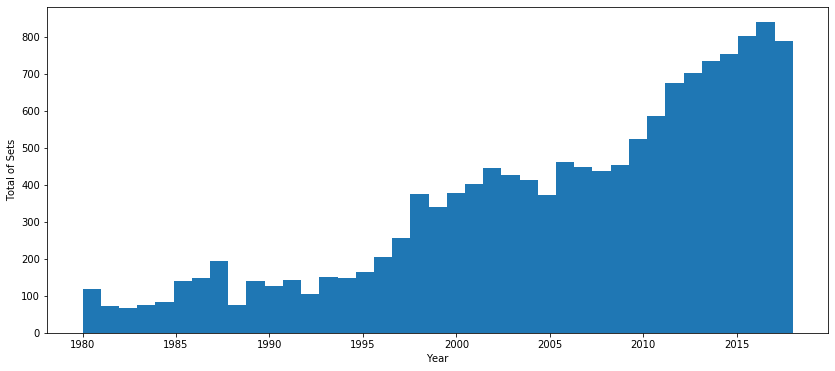

In [9]:
# plot number of sets per year

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['year'].values, bins=set_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='Total of Sets')
plt.show()

In [10]:
# clean current price, and create 2 new columns

set_df['price_used'] = set_df['current_price'].apply(lh.get_price_used)
set_df['price_new'] = set_df['current_price'].apply(lh.get_price_new)
set_df[['set_no', 'name', 'current_price', 'price_used', 'price_new']][2205:2215]

,set_no,name,current_price,price_used,price_new
2205,2161-1,Aqua Dozer,"New: $90, Used: $21",21.0,90.0
2206,2162-1,Hydro Reef Wrecker,"New: $89, Used: $44",44.0,89.0
2207,2163-1,Toucan,"New: $1, Used: $0",0.0,1.0
2208,2164-1,Whale,"New: $2, Used: $1",1.0,2.0
2209,2165-1,Rhinocerous,"New: $2, Used: Not known",NaN,2.0
2210,2166-1,Elephant,"New: $3, Used: Not known",NaN,3.0
2211,2167-1,Penguin,"New: $2, Used: Not known",NaN,2.0
2212,2168-1,Rattle,"New: $5, Used: Not known",NaN,5.0
2213,2181-1,Infomaniac,"New: $44, Used: $45",45.0,44.0
2214,2184-1,XL Bulk Bucket,"New: Not known, Used: Not known",NaN,NaN


## 2.2 Filter Out Non-System Sets

File: ```brickset_set_filter.ipynb```

Goal: Start with the full cleaned brickset sets file, and remove sets which are not appropriate for analysis (because it would be comparing apples to oranges). This includes filtering out baby sets (pieces are larger than regular legos), keychains, games, esoteric promotional sets, etc.       

Result: Creates the file ```brickset_set_filter.csv```.

In [11]:
SET_FILE = 'data/brickset_set_clean.csv'
set_df = pd.read_csv(SET_FILE)
set_df.head()
set_df.info()

,set_no,name,theme_group,theme,subtheme,year,volume,weight,piece_cnt,minifig_cnt,inventory_url,minifig_url,price_store,price_new,price_used,rating_value,rating_votes,main_tag,set_type,packaging
0,722-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,301.0,0.0,NaN,NaN,20.00,200.0,78.0,4.4,5.0,NaN,Normal,NaN
1,733-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,533.0,0.0,NaN,NaN,39.00,566.0,109.0,4.5,2.0,NaN,Normal,NaN
2,744-1,"Universal Building Set with Motor, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,537.0,0.0,NaN,NaN,59.00,252.0,97.0,5.0,2.0,NaN,Normal,NaN
3,820-1,Red Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,NaN,NaN,34.0,0.0,NaN,NaN,4.75,NaN,NaN,NaN,NaN,NaN,Normal,NaN
4,822-1,Blue Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,NaN,NaN,34.0,0.0,NaN,NaN,4.75,29.0,5.0,NaN,NaN,NaN,Normal,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13762 entries, 0 to 13761
Data columns (total 20 columns):
set_no           13762 non-null object
name             13762 non-null object
theme_group      13762 non-null object
theme            13762 non-null object
subtheme         10048 non-null object
year             13762 non-null float64
volume           2925 non-null float64
weight           3086 non-null float64
piece_cnt        10862 non-null float64
minifig_cnt      13762 non-null float64
inventory_url    6961 non-null object
minifig_url      6266 non-null object
price_store      8384 non-null float64
price_new        8532 non-null float64
price_used       7048 non-null float64
rating_value     6825 non-null float64
rating_votes     6825 non-null float64
main_tag         0 non-null float64
set_type         13762 non-null object
packaging        8923 non-null object
dtypes: float64(11), object(9)
memory usage: 2.1+ MB


In [12]:
# filter by group-theme to get rid of baby sets, etc

remove_group_ls = ['Basic', 'Educational', 'Miscellaneous', 'Other', 'Pre-school', 'Vintage themes', ]
set_df = set_df.loc[set_df['theme_group'].isin(remove_group_ls)==False]
set_df.shape

(7118, 20)

## 2.3 Join Brickset With Kaggle

File: ```merge_brickset_kaggle.ipynb```

Goal: Merge the filtered brickset set data with kaggle inventory data (for number of parts, colors, etc).

Result: Outputs the file ```merge_full.csv```.

In [13]:
FILTER_FILE = 'data/brickset_set_filter.csv'
INVENTORIES_FILE = 'data/kaggle_inventories.csv'
INVENTORYPARTS_FILE = 'data/kaggle_inventory_parts.csv'
COLORS_FILE = 'data/kaggle_colors.csv'
PARTS_FILE = 'data/kaggle_parts.csv'
PARTCATEGORIES_FILE = 'data/kaggle_part_categories.csv'

In [14]:
brickset = pd.read_csv(FILTER_FILE)
brickset[["set_no", "piece_cnt"]].head(3)

,set_no,piece_cnt
0,858-1,242.0
1,1591-1,40.0
2,1592-1,471.0


In [15]:
kaggle_inventories = pd.read_csv(INVENTORIES_FILE)
kaggle_inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [16]:
## select needed columns
kaggle_inventories = kaggle_inventories[["set_num", "id"]]
kaggle_inventories.columns = ["set_no", "inventory_id"]
kaggle_inventories.head()

,set_no,inventory_id
0,7922-1,1
1,3931-1,3
2,6942-1,4
3,5158-1,15
4,903-1,16


In [17]:
brickset = pd.merge(brickset, kaggle_inventories, how="left")
brickset[["set_no", "piece_cnt", "inventory_id"]].head(3)

,set_no,piece_cnt,inventory_id
0,858-1,242.0,4886.0
1,1591-1,40.0,11940.0
2,1592-1,471.0,14106.0


## 2.4 Introduce New Features

File: ```merge_features.ipynb```

Goal: Create new composite features for analysis.

Result: Outputs the file ```merge_feature.csv```.

In [18]:
MERGE_FILE = 'data/merge_full.csv'
set_df = pd.read_csv(MERGE_FILE)
set_df.head()
set_df.info(verbose=True, null_counts=True)

,set_no,name,price_store,price_new,price_used,rating_value,rating_votes,theme_group,theme,subtheme,...,tiles_printed_tot_prts,tiles_special_tot_prts,tools_tot_prts,transportation_-_land_tot_prts,transportation_-_sea_and_air_tot_prts,tubes_and_hoses_tot_prts,wheels_and_tyres_tot_prts,windows_and_doors_tot_prts,windscreens_and_fuselage_tot_prts,znap_tot_prts
0,858-1,Auto Engines,NaN,NaN,51.0,4.5,2.0,Technical,Technic,NaN,...,0,0,0,0,0,6,2,0,0,0
1,1591-1,Danone Delivery Truck,NaN,129.0,28.0,NaN,NaN,Modern day,Town,Special,...,0,0,0,2,0,0,6,2,1,0
2,1592-1,Town Square - Castle Scene,NaN,1168.0,191.0,4.8,4.0,Modern day,Town,Classic,...,0,0,0,6,0,0,12,14,0,0
3,1651-2,Maersk Line Container Lorry,NaN,NaN,444.0,5.0,1.0,Modern day,Town,Special,...,0,0,0,7,0,0,28,7,1,0
4,3634-1,Charlie Crow's Carry-All,NaN,90.0,13.0,3.0,1.0,Junior,Fabuland,NaN,...,0,0,0,2,0,0,0,3,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 136 columns):
set_no                                              5303 non-null object
name                                                5303 non-null object
price_store                                         4178 non-null float64
price_new                                           5003 non-null float64
price_used                                          4972 non-null float64
rating_value                                        4560 non-null float64
rating_votes                                        4560 non-null float64
theme_group                                         5303 non-null object
theme                                               5303 non-null object
subtheme                                            3915 non-null object
year                                                5303 non-null int64
volume                                              2143 non-null float64
weight     

[Text(0, 0.5, 'Total of Sets'), (0, 200), Text(0.5, 0, 'Set Price')]

(array([ 13.,  74., 190., 298.,  43., 100., 106., 117.,  60., 380.,  16.,
         38., 145.,   4., 197.,  11.,  17.,  10.,   7., 426.,   5.,  15.,
          8.,   9., 124.,   8.,  11.,   6.,  10., 291.,   0.,   0.,   8.,
          2.,  61.,   8.,   5.,   6.,   3., 202.,   0.,   5.,   3.,   9.,
         18.,   1.,   2.,   3.,   7., 238.,   0.,   7.,   1.,   4.,  10.,
          0.,   0.,   3.,   3., 106.,   0.,   0.,   1.,   2.,   3.,   8.,
          0.,   3.,   4., 100.,   0.,   1.,   3.,   1.,   7.,   1.,   0.,
          0.,   2.,  73.,   0.,   2.,   0.,   1.,   7.,   0.,   0.,   1.,
          1.,  76.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   5.,
         83.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  11.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  39.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,  24.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   2.,  11.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

(array([226., 410., 317., 251., 235., 163., 179., 137., 195., 124.,  86.,
        105.,  97.,  80.,  61.,  62.,  56.,  91.,  65.,  53.,  46.,  41.,
         38.,  43.,  28.,  52.,  36.,  42.,  23.,  25.,  27.,  21.,  24.,
         16.,  26.,  15.,  12.,  17.,  22.,  17.,  11.,  22.,   6.,  12.,
         17.,  12.,  12.,  13.,  13.,   7.,   4.,  15.,   9.,   3.,   8.,
          8.,   6.,   5.,   6.,   6.,   9.,   7.,   8.,   6.,   5.,   8.,
          3.,   6.,   9.,   3.,   9.,   2.,   5.,   3.,   9.,   4.,   5.,
          5.,   1.,   4.,   6.,   5.,   4.,   4.,   4.,   3.,   7.,   5.,
          4.,   2.,   2.,   4.,   2.,   5.,   4.,   3.,   5.,   1.,   4.,
          1.,   1.,   0.,   1.,   0.,   0.,   5.,   1.,   1.,   3.,   2.,
          0.,   1.,   4.,   2.,   1.,   1.,   0.,   3.,   2.,   2.,   1.,
          1.,   1.,   0.,   0.,   0.,   1.,   3.,   0.,   2.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   3.,   1.,   0.,
          0.,   2.,   0.,   0.,   0., 

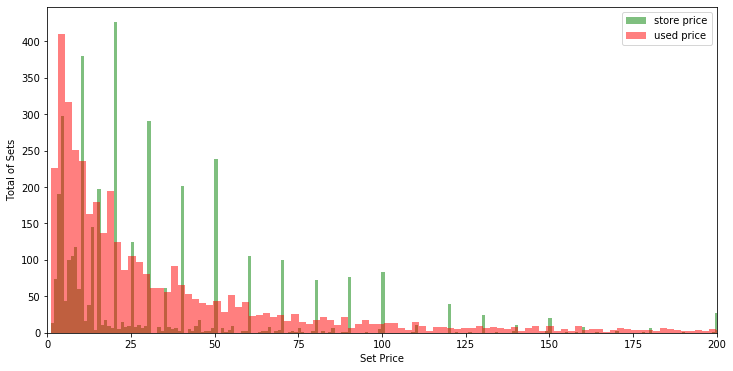

In [19]:
# store price and used price comparison

price_df = set_df.loc[(set_df['price_store']>=1) & (set_df['price_used']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(12, 6), facecolor='white')
axs.set(xlabel='Set Price', ylabel='Total of Sets', xlim=(0, 200))

axs.hist(price_df['price_store'].values, bins=500, color='green', label='store price', alpha=.5)
axs.hist(price_df['price_used'].values, bins=500, color='red', label='used price', alpha=.5)

plt.legend()
plt.show()

In [20]:
# create aftermarket column 

set_df['aftermarket'] = set_df.apply(lh.get_aftermarket, axis=1)
set_df[['set_no', 'name', 'price_used', 'price_store', 'aftermarket']][100:110]

,set_no,name,price_used,price_store,aftermarket
100,4005-1,Tug Boat,22.0,10.0,12.0
101,4015-1,Freighter,65.0,NaN,NaN
102,4025-1,Fire Boat,33.0,NaN,NaN
103,6302-1,Mini-Figure Set,30.0,NaN,NaN
104,6308-1,Policemen,6.0,NaN,NaN
105,6362-1,Post Office,40.0,NaN,NaN
106,6372-1,Town House,47.0,NaN,NaN
107,6607-1,Service Truck,4.0,NaN,NaN
108,6608-1,Tractor,3.0,NaN,NaN
109,6651-1,Mail Truck,11.0,NaN,NaN


(array([  2.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   1.,   1.,   5.,
          0.,   0.,   3.,   0.,   2.,   0.,   6.,   7.,   5.,  13.,  12.,
         22.,  31.,  25.,  60.,  72., 134., 154., 325., 694., 908., 480.,
        248., 174., 105.,  62.,  69.,  60.,  41.,  22.,  33.,  24.,  14.,
         29.,  13.,  10.,   9.,   9.,   6.,  10.,   9.,   9.,   5.,   9.,
          6.,   5.,   5.,   2.,   7.,   1.,   7.,   4.,   2.,   3.,   1.,
          5.,   2.,   3.,   2.,   1.,   1.,   2.,   1.,   4.,   0.,   0.,
          1.,   1.,   2.,   1.,   0.,   3.,   0.,   0.,   2.,   1.,   1.,
          1.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          3.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0., 

[Text(0, 0.5, 'Total of Sets'),
 (-200, 200),
 Text(0.5, 0, 'After-Market Value $')]

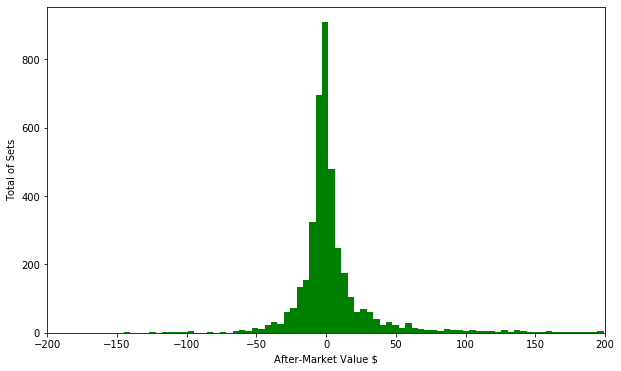

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')

axs.hist(set_df.loc[set_df['aftermarket'].isna()==False]['aftermarket'].values, bins=200, color='green')
axs.set(xlabel='After-Market Value $', ylabel='Total of Sets', xlim=(-200, 200))  

plt.show()

##  3.1 Investigate Colinearity

File: ```colinearity.ipynb```

Goal: Investigate colinearity of the model's features.

In [22]:
FEATURE_FILE = 'data/merge_feature.csv'
full_df = pd.read_csv(FEATURE_FILE)
full_df.head()
full_df.info()

,set_no,name,price_store,price_used,year,volume,weight,number_parts,total_parts,number_spare_parts,...,windscreens_and_fuselage_tot_prts,znap_tot_prts,category,scolor_1st,scolor_2nd,popularity,aftermarket,adj_store_price,adj_aftermarket,profitable
0,15-1,Castle Minifigures,NaN,63.0,1984,NaN,NaN,16,38,0,...,0,0,Historical,Gray,Black,NaN,NaN,NaN,NaN,NaN
1,105-1,Mail Van,NaN,102.0,1984,NaN,NaN,34,65,0,...,1,0,Modern-Town,Red,White,4.0,NaN,NaN,NaN,NaN
2,3639-1,Paddy Wagon,NaN,14.0,1984,NaN,NaN,11,12,0,...,0,0,Bigfig-Junior,Blue,Black,NaN,NaN,NaN,NaN,NaN
3,3664-1,Bertie Bulldog (Police Chief) and Constable Bu...,NaN,31.0,1984,NaN,NaN,24,63,0,...,0,0,Bigfig-Junior,Blue,Red,5.0,NaN,NaN,NaN,NaN
4,3670-1,Service Station,20.0,54.0,1984,NaN,NaN,30,54,0,...,0,0,Bigfig-Junior,Yellow,Red,NaN,34.0,49.62,4.38,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Columns: 134 entries, set_no to profitable
dtypes: float64(9), int64(120), object(5)
memory usage: 5.0+ MB


In [23]:
# pull out numeric features 

feature_ls = ['year', 'volume', 'weight', 'total_parts', 'number_parts', 'number_colors', ]
feature_df = full_df[feature_ls]

In [24]:
# remove nan's, just for investigation 

feature_df = feature_df.dropna()
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 242 to 4920
Data columns (total 6 columns):
year             1938 non-null int64
volume           1938 non-null float64
weight           1938 non-null float64
total_parts      1938 non-null int64
number_parts     1938 non-null int64
number_colors    1938 non-null int64
dtypes: float64(2), int64(4)
memory usage: 106.0 KB


In [25]:
# variance inflation factor

vif = [VIF(feature_df.values, i) for i in range(feature_df.shape[1])]
list(zip(feature_df.columns, vif))

[('year', 6.800330031359406),
 ('volume', 29.54127621038952),
 ('weight', 46.165330132252286),
 ('total_parts', 19.462995882739012),
 ('number_parts', 20.32183516886591),
 ('number_colors', 16.267171157112692)]

## 3.2 Logistic Regression

File: ```logistic_regression.ipynb```

Goal: Use logistic regression to create a model for the profitability feature.

In [26]:
FEATURE_FILE = 'data/merge_feature.csv'
full_df = pd.read_csv(FEATURE_FILE)
full_df.head()
full_df.info()

,set_no,name,price_store,price_used,year,volume,weight,number_parts,total_parts,number_spare_parts,...,windscreens_and_fuselage_tot_prts,znap_tot_prts,category,scolor_1st,scolor_2nd,popularity,aftermarket,adj_store_price,adj_aftermarket,profitable
0,15-1,Castle Minifigures,NaN,63.0,1984,NaN,NaN,16,38,0,...,0,0,Historical,Gray,Black,NaN,NaN,NaN,NaN,NaN
1,105-1,Mail Van,NaN,102.0,1984,NaN,NaN,34,65,0,...,1,0,Modern-Town,Red,White,4.0,NaN,NaN,NaN,NaN
2,3639-1,Paddy Wagon,NaN,14.0,1984,NaN,NaN,11,12,0,...,0,0,Bigfig-Junior,Blue,Black,NaN,NaN,NaN,NaN,NaN
3,3664-1,Bertie Bulldog (Police Chief) and Constable Bu...,NaN,31.0,1984,NaN,NaN,24,63,0,...,0,0,Bigfig-Junior,Blue,Red,5.0,NaN,NaN,NaN,NaN
4,3670-1,Service Station,20.0,54.0,1984,NaN,NaN,30,54,0,...,0,0,Bigfig-Junior,Yellow,Red,NaN,34.0,49.62,4.38,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Columns: 134 entries, set_no to profitable
dtypes: float64(9), int64(120), object(5)
memory usage: 5.0+ MB


In [27]:
# drop volume and weight since they are sparse and colinear

full_df = full_df.drop(columns=['volume', 'weight'])

In [28]:
# filter out rows without profitable feature

full_df = full_df.loc[full_df['profitable'].isna()==False]
full_df.shape

(3832, 132)

In [29]:
# target series

target_sr = full_df['profitable']
target_sr.shape

(3832,)

In [30]:
# feature dataframe with one-hot encoding

columns_st = set(full_df.columns)
drop_st = set(['set_no', 'name', 'price_store', 'price_used', 'aftermarket', 'popularity', 
               'adj_store_price', 'adj_aftermarket', 'profitable'])
feature_st = columns_st.difference(drop_st)

feature_cat_df = full_df[list(feature_st)]

feature_df = pd.get_dummies(feature_cat_df, drop_first= True, 
               columns=['category', 'scolor_1st', 'scolor_2nd'])
feature_df.shape
feature_df.columns

(3832, 151)

Index(['non-lego_cnt_prts', 'technic_bushes_tot_prts', 'ho_scale_cnt_prts',
       'tiles_cnt_prts', 'minifig_accessories_cnt_prts', 'znap_tot_prts',
       'tubes_and_hoses_cnt_prts', 'tools_cnt_prts', 'technic_beams_cnt_prts',
       'transportation_-_land_cnt_prts',
       ...
       'scolor_1st_Yellow', 'scolor_2nd_Blue', 'scolor_2nd_Brown',
       'scolor_2nd_Gray', 'scolor_2nd_Green', 'scolor_2nd_Red',
       'scolor_2nd_Tan', 'scolor_2nd_Transparent', 'scolor_2nd_White',
       'scolor_2nd_Yellow'],
      dtype='object', length=151)

In [31]:
# split train and test 

TEST_SPLIT = 0.2
SEED = 666
MAX_ITER = 900

y_train, y_test, X_train, X_test = MS.train_test_split(target_sr, feature_df, stratify=feature_df['year'], 
                                                       test_size=TEST_SPLIT, random_state=SEED)
y_train.shape
y_test.shape 
X_train.shape
X_test.shape

(3065,)

(767,)

(3065, 151)

(767, 151)

In [32]:
# optimize hyper-parameters with grid-search

sampler = OS.SMOTE(random_state=SEED)
scaler = PP.StandardScaler()
logreg_best = LM.LogisticRegression(penalty='l2', max_iter=MAX_ITER, random_state=SEED)
pipeline = PL.Pipeline([('sampler', sampler), ('transformer', scaler), ('estimator', logreg_best)])

param_dx = {
    'estimator__solver': ['saga', 'liblinear'],
    'estimator__C': [1e-1, 1e1, 1e3, 1e5],
    }

searcher = MS.GridSearchCV(pipeline, param_dx, scoring='accuracy', cv=5)

In [33]:
# run the grid search

searcher.fit(X_train, y_train);

C:\Users\natha\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\natha\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\natha\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\natha\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\natha\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

In [34]:
# check the best parameters found by grid search

best_parameters = searcher.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

train_pred = searcher.predict(X_train)
train_accuracy = MT.accuracy_score(y_train, train_pred)
test_pred = searcher.predict(X_test)
test_accuracy = MT.accuracy_score(y_test, test_pred)

print("")
print("Training Accuracy: {:.4}%".format(train_accuracy * 100))
print("")
print("Validation Accuracy: {:.4}%".format(test_accuracy * 100))
print("")
print("Random Guess Accuracy: {:.4}%".format(len(y_test[y_test==0]) / len(y_test) * 100))

Grid Search found the following optimal parameters: 
estimator__C: 1000.0
estimator__solver: 'liblinear'

Training Accuracy: 80.72%

Validation Accuracy: 75.88%

Random Guess Accuracy: 73.01%


## 3.3 Random Forest

File: ```random_forest.ipynb```

Goal: Use random forest to create a model for the profitability binary-class feature.

In [35]:
# use the same data file, target, features, and train-test as for logistic regression

In [36]:
# setup the grid-search
# not sure for process on grid-search, the best parameters keep changing, as if the default are best

sampler = OS.SMOTE(random_state=SEED)
scaler = PP.StandardScaler()
randforest = ES.RandomForestClassifier(random_state=SEED)
pipeline = PL.Pipeline([('sampler', sampler), ('transformer', scaler), ('estimator', randforest)])

param_dx = {
    'estimator__n_estimators': [140, 160],
    'estimator__max_depth': [20, 30],
    'estimator__min_impurity_decrease': [0.00001, 0.0001],
    }

searcher = MS.GridSearchCV(pipeline, param_dx, scoring='accuracy', cv=5)

In [37]:
# run the grid search

%timeit
searcher.fit(X_train, y_train);

In [38]:
# check the best parameters fund by grid search

best_parameters = searcher.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

train_pred = searcher.predict(X_train)
train_accuracy = MT.accuracy_score(y_train, train_pred)
test_pred = searcher.predict(X_test)
test_accuracy = MT.accuracy_score(y_test, test_pred)

print("")
print("Training Accuracy: {:.4}%".format(train_accuracy * 100))
print("")
print("Validation Accuracy: {:.4}%".format(test_accuracy * 100))
print("")
print("Random Guess Accuracy: {:.4}%".format(len(y_test[y_test==0]) / len(y_test) * 100))

Grid Search found the following optimal parameters: 
estimator__max_depth: 30
estimator__min_impurity_decrease: 1e-05
estimator__n_estimators: 160

Training Accuracy: 99.77%

Validation Accuracy: 77.97%

Random Guess Accuracy: 73.01%


## 3.4 XGBoost

File: ```xgboost.ipynb```

In [39]:
# importing libraries and aliases used in the remainder of the notebook
import pandas as pd
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import plot_confusion_matrix as pcm;

## Prepare Target & Features
Dropped 'volume' and 'weight' since they have many nulls and are collinear.  
Dropped arbitrary details contained in 'set_no' and 'name'.  
Dropped price data used to create the target.  
Dropped popularity because it reflects future perception not info available at the time of release.  
Dropped number of unique parts by category columns since we already have the total by category and wanted to prevent redundancy in the signal provided by those features. The total pieces per set were kept since the category breakdowns were dropped, but the total unique parts per set were dropped since their category breakdowns were kept. The intent of this was to reduce dimensionality and collinearity to hopefully improve model results and generalizability.

In [40]:
FEATURE_FILE = 'data/merge_feature.csv'
full_df = pd.read_csv(FEATURE_FILE)

In [41]:
drop_category_nmbr_cnts = [s for s in list(full_df.columns) if '_cnt_prts' in s]

In [42]:
feat_df = full_df.drop(columns=['set_no', 'name',  'price_store', 'price_used',
                                'volume', 'weight', 'total_parts','number_spare_parts',
                                'popularity', 'aftermarket', 'adj_store_price',
                                'adj_aftermarket']+drop_category_nmbr_cnts)

# filter out rows without profitable (i.e. target), and the few without primary/secondary colors
feat_df.dropna(axis=0,
               subset=['profitable', 'scolor_1st', 'scolor_2nd'],
               inplace=True)

# feat_df.head()

In [43]:
# confirmed no nulls
# feat_df.info(verbose=True, null_counts=True)

In [44]:
# target series
target = feat_df['profitable']
print(target.shape)

# initial features
features = feat_df.drop(columns=['profitable'])
print(features.shape)

(3824,)
(3824, 64)


In [45]:
# feature dataframe with one-hot encoding
features = pd.get_dummies(features, drop_first= True,
                          columns=['category', 'scolor_1st', 'scolor_2nd'])
features.shape

(3824, 92)

## Train-Test Split

In [46]:
TEST_SPLIT = 0.2
SEED = 0
y_train, y_test, X_train, X_test = train_test_split(target, features,
                                                    stratify=features['year'],
                                                    test_size=TEST_SPLIT, random_state=SEED)

print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(3059,)
(765,)
(3059, 92)
(765, 92)


## PCA Analysis
We implemented Principal Component Analysis (PCA) to see if we could simplify the model and help it generalize well. We identified the number of parameters that explained 95% of the variance below, but during the modeling we also tried other levels. None ultimately proved fruitful. While the count of parameters may represent a different level of explained variance within each fold of the cross validation or the testing data used later in the notebook this was seen as an acceptable approximation. The cumulative explained variance plot showed the promise of being able to reduce dimensionality to improve the speed of the hyperparameter grid search, and we had hoped generalizability as well.

In [47]:
# standardizing data
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [48]:
# Initial full PCA of features
pca = PCA(random_state=SEED)
x_pca = pca.fit_transform(X_train_std)

In [49]:
# defining count of PCA features to capture 95% of variance from entire train set
PCA_COUNT = sum(pca.explained_variance_ratio_.cumsum() < .95) + 1
print(PCA_COUNT)
PCA_EXPLAINED_VAR = pca.explained_variance_ratio_.cumsum()[PCA_COUNT-1]
print(PCA_EXPLAINED_VAR)

66
0.9522254515489256


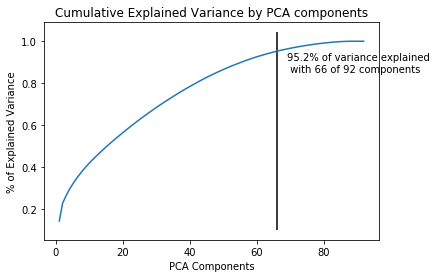

In [50]:
# plotting PCA cumulative explained variance.
feat_cnt = X_train.shape[1]
plt.plot(range(1,feat_cnt+1), pca.explained_variance_ratio_.cumsum())

ax = plt.gca()
ax.set_xlabel("PCA Components")
ax.set_ylabel("% of Explained Variance")
ax.set_title("Cumulative Explained Variance by PCA components")

ax.vlines(x=PCA_COUNT, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1])
ax.annotate(f'{round(100*PCA_EXPLAINED_VAR,1)}% of variance explained \n with {PCA_COUNT} of {feat_cnt} components',
            xy=[PCA_COUNT, PCA_EXPLAINED_VAR],
            xytext=[PCA_COUNT+3, PCA_EXPLAINED_VAR-0.1]);

## GridSearchCV with XGBoost and Pipeline of Scaling - Baseline
A Baseline model is fit with all the parameter and standard scaling. Accuracy is ok, but the significant increase between the CV accuracy and accuracy on the entire training set makes us believe our model may be over fit. Attempts will be made to reduce the features to account for this.

In [51]:
# calculating class ratio for XGBoost balancing
class_pos_rate = len(y_train[y_train==0]) / len(y_train[y_train==1])
class_pos_rate

2.814214463840399

In [52]:
# establishing the model
pipe = Pipeline([("scaler", StandardScaler()),
                 ("xgb", XGBClassifier(random_state=SEED,
                                       scale_pos_weight=class_pos_rate))])

# The original parameter grid is replaced with its resulting selection to speed up the notebook
# param_grid = {'xgb__learning_rate': [0.1, 0.15, 0.2],
#               'xgb__max_depth': [3, 6, 9],
#               'xgb__min_child_weight': [1, 2, 3],
#               'xgb__subsample': [0.75, 0.85, 1],
#               'xgb__n_estimators': [100, 150, 200]}

param_grid = {'xgb__learning_rate': [0.2],
              'xgb__max_depth': [9],
              'xgb__min_child_weight': [1],
              'xgb__subsample': [0.85],
              'xgb__n_estimators': [150]}

grid_clf = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=3)

In [53]:
grid_clf.fit(X_train, y_train);

In [54]:
grid_clf_results = pd.DataFrame(grid_clf.cv_results_)
grid_clf.best_score_

0.7933965348152991

In [55]:
# observing grid search results
best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
training_accuracy = accuracy_score(y_train, training_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))

Grid Search found the following optimal parameters: 
xgb__learning_rate: 0.2
xgb__max_depth: 9
xgb__min_child_weight: 1
xgb__n_estimators: 150
xgb__subsample: 0.85

Training Accuracy: 99.77%


## GridSearchCV with XGBoost and Pipeline of Scaling and PCA
PCA was seen to result in an unacceptable loss in CV score even when high %'s of explained variance were accounted for. It did not appear to help with potential over-fitting. And will not be pursued further.

In [56]:
pca_pipe = Pipeline([("scaler", StandardScaler()),
                     ("pca", PCA(n_components=PCA_COUNT,
                                 random_state=SEED)),
                     ("xgb", XGBClassifier(random_state=SEED,
                                           scale_pos_weight=class_pos_rate))])

# The original parameter grid is replaced with its resulting selection to speed up the notebook
# param_grid = {'xgb__learning_rate': [0.1, 0.15, 0.2],
#               'xgb__max_depth': [3, 6, 9],
#               'xgb__min_child_weight': [1, 2, 3],
#               'xgb__subsample': [0.75, 0.85, 1],
#               'xgb__n_estimators': [100, 150, 200]}

param_grid = {'xgb__learning_rate': [0.2],
              'xgb__max_depth': [9],
              'xgb__min_child_weight': [2],
              'xgb__subsample': [0.85],
              'xgb__n_estimators': [200]}

pca_clf = GridSearchCV(pca_pipe, param_grid, scoring='accuracy', cv=3)

In [57]:
pca_clf.fit(X_train, y_train);

In [58]:
pca_clf_results = pd.DataFrame(pca_clf.cv_results_)
pca_clf.best_score_

0.7692056227525335

In [59]:
pca_best_params = pca_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(pca_best_params.keys()):
    print("%s: %r" % (param_name, pca_best_params[param_name]))

pca_training_preds = pca_clf.predict(X_train)
pca_training_accuracy = accuracy_score(y_train, pca_training_preds)

print("")
print("Training Accuracy: {:.4}%".format(pca_training_accuracy * 100))

Grid Search found the following optimal parameters: 
xgb__learning_rate: 0.2
xgb__max_depth: 9
xgb__min_child_weight: 2
xgb__n_estimators: 200
xgb__subsample: 0.85

Training Accuracy: 99.77%


## GridSearchCV with XGBoost and Pipeline of Scaling and SMOTE Oversampling
SMOTE was incorporated into the pipeline to account for the class imbalance. While it showed increased an increased CV score here, it was often observed to decrease the scores slightly in other iterations of the model (i.e. with different parameter grids, different scoring metrics, with PCA, etc.). It will be implemented in parallel to a non-SMOTE model and they will be evaluated at the testing phase.

In [60]:
smote_pipe = Pipeline([("scaler", StandardScaler()),
                       ("smote", SMOTE(random_state=SEED)),
                       ("xgb", XGBClassifier(random_state=SEED))])

# The original parameter grid is replaced with its resulting selection to speed up the notebook
# param_grid = {'xgb__learning_rate': [0.1, 0.15, 0.2],
#               'xgb__max_depth': [3, 6, 9],
#               'xgb__min_child_weight': [1, 2, 3],
#               'xgb__subsample': [0.75, 0.85, 1],
#               'xgb__n_estimators': [100, 150, 200]}

param_grid = {'xgb__learning_rate': [0.1],
              'xgb__max_depth': [9],
              'xgb__min_child_weight': [1],
              'xgb__subsample': [1],
              'xgb__n_estimators': [100]}

smote_grid_clf = GridSearchCV(smote_pipe, param_grid, scoring='accuracy', cv=3)

In [61]:
smote_grid_clf.fit(X_train, y_train);

In [62]:
smote_grid_clf_results = pd.DataFrame(smote_grid_clf.cv_results_)
smote_grid_clf.best_score_

0.7950310559006211

In [63]:
smote_best_parameters = smote_grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(smote_best_parameters.keys()):
    print("%s: %r" % (param_name, smote_best_parameters[param_name]))

smote_training_preds = smote_grid_clf.predict(X_train)
smote_training_accuracy = accuracy_score(y_train, smote_training_preds)

print("")
print("Training Accuracy {:.4}%".format(smote_training_accuracy * 100))

Grid Search found the following optimal parameters: 
xgb__learning_rate: 0.1
xgb__max_depth: 9
xgb__min_child_weight: 1
xgb__n_estimators: 100
xgb__subsample: 1

Training Accuracy 99.08%


## Identifying Most Influential Features from Baseline
Features were sorted by their importance in the baseline model. While this isn't a perfect ordering of importance it was seen as better than a random guess and a quick way to isolate more important features.  
  
Future work on this project would include improving the methodology for selecting the best parameters. Perhaps through backward selection of the ultimately selected subset of features, and potentially on-by-one forward selection of the out of set features to see if one may improve the model even if those higher on the list hadn't.

In [64]:
importance_df = pd.DataFrame.from_dict(dict(zip(list(X_train.columns),
                                                list(grid_clf.best_estimator_
                                                             .named_steps["xgb"]
                                                            .feature_importances_))),
                                       orient='index')
importance_df.columns = ["importance"]

In [65]:
importance_df = importance_df.sort_values(by="importance",
                                          ascending=False)
importance_df.head()

,importance
category_Historical,0.107342
category_Licensed-Movie,0.040536
category_Licensed-Other,0.032610
category_Bigfig-Girls,0.031346
mechanical_tot_prts,0.025208


In [66]:
top_feats = list(importance_df.head(71).index)
X_train_subset = X_train[top_feats]
X_test_subset = X_test[top_feats]

## GridSearchCV with XGBoost and Pipeline of Scaling with Most Important Features
The model was fit on the top 20 features and then additional features were added to the subset one at a time and the subset with the top CV score was chosen as the final model. This included the top 71 features from the baseline model and showed 0.5% improvement in accuracy.  
  
The reduction in features will hopefully decrease the risk of over-fitting which was observed through the high training scores when the model was fit to the entirety of the training data.

In [67]:
impt_pipe = Pipeline([("scaler", StandardScaler()),
                      ("xgb", XGBClassifier(random_state=SEED,
                                            scale_pos_weight=class_pos_rate))])

# The original parameter grid is replaced with its resulting selection to speed up the notebook
# param_grid = {'xgb__learning_rate': [0.1, 0.15, 0.2],
#               'xgb__max_depth': [3, 6, 9],
#               'xgb__min_child_weight': [1, 2, 3],
#               'xgb__subsample': [0.75, 0.85, 1],
#               'xgb__n_estimators': [100, 150, 200]}

param_grid = {'xgb__learning_rate': [0.1],
              'xgb__max_depth': [9],
              'xgb__min_child_weight': [1],
              'xgb__subsample': [0.85],
              'xgb__n_estimators': [200]}

impt_clf = GridSearchCV(impt_pipe, param_grid, scoring='accuracy', cv=3)

In [68]:
impt_clf.fit(X_train_subset, y_train);

In [69]:
impt_clf_results = pd.DataFrame(impt_clf.cv_results_)
impt_clf.best_score_

0.7986270022883295

In [70]:
impt_best_parameters = impt_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(impt_best_parameters.keys()):
    print("%s: %r" % (param_name, impt_best_parameters[param_name]))

impt_training_preds = impt_clf.predict(X_train_subset)
impt_training_accuracy = accuracy_score(y_train, impt_training_preds)

print("")
print("Training Accuracy: {:.4}%".format(impt_training_accuracy * 100))

Grid Search found the following optimal parameters: 
xgb__learning_rate: 0.1
xgb__max_depth: 9
xgb__min_child_weight: 1
xgb__n_estimators: 200
xgb__subsample: 0.85

Training Accuracy: 99.64%


## GridSearchCV with XGBoost and Pipeline of Scaling and SMOTE with Most Important Features
The previous model was also checked with SMOTE, but it didn't perform as well.

In [71]:
impt_smote_pipe = Pipeline([("scaler", StandardScaler()),
                      ("smote", SMOTE(random_state=SEED)),
                      ("xgb", XGBClassifier(random_state=SEED))])

# The original parameter grid is replaced with its resulting selection to speed up the notebook
# param_grid = {'xgb__learning_rate': [0.1, 0.15, 0.2],
#               'xgb__max_depth': [3, 6, 9],
#               'xgb__min_child_weight': [1, 2, 3],
#               'xgb__subsample': [0.75, 0.85, 1],
#               'xgb__n_estimators': [100, 150, 200]}

param_grid = {'xgb__learning_rate': [0.1],
              'xgb__max_depth': [9],
              'xgb__min_child_weight': [1],
              'xgb__subsample': [0.85],
              'xgb__n_estimators': [200]}

impt_smote_clf = GridSearchCV(impt_smote_pipe, param_grid, scoring='accuracy', cv=3)

In [72]:
impt_smote_clf.fit(X_train_subset, y_train);

In [73]:
impt_smote_clf_results = pd.DataFrame(impt_smote_clf.cv_results_)
impt_smote_clf.best_score_

0.7940503432494279

In [74]:
impt_smote_best_parameters = impt_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(impt_smote_best_parameters.keys()):
    print("%s: %r" % (param_name, impt_smote_best_parameters[param_name]))

impt_smote_training_preds = impt_smote_clf.predict(X_train_subset)
impt_smote_training_accuracy = accuracy_score(y_train, impt_smote_training_preds)

print("")
print("Training Accuracy: {:.4}%".format(impt_smote_training_accuracy * 100))

Grid Search found the following optimal parameters: 
xgb__learning_rate: 0.1
xgb__max_depth: 9
xgb__min_child_weight: 1
xgb__n_estimators: 200
xgb__subsample: 0.85

Training Accuracy: 99.67%


## Testing
Attempts were made to optimize the model to increase the F1 score, but it was observed to significantly increase recall while also decreasing precision. While it was nice that it produced many more true positives, it did so at an unacceptable loss in precision, so accuracy was maintained as the key metric.

The final model with only the important features performed best. Future efforts to improve the model should include more robust attempts at identifying the most important features, so over-fitting can be mitigated.

In [75]:
val_preds = grid_clf.predict(X_test)
val_accuracy = accuracy_score(y_test, val_preds)

pca_val_preds = pca_clf.predict(X_test)
pca_val_accuracy = accuracy_score(y_test, pca_val_preds)

smote_val_preds = smote_grid_clf.predict(X_test)
smote_val_accuracy = accuracy_score(y_test, smote_val_preds)

impt_val_preds = impt_clf.predict(X_test_subset)
impt_val_accuracy = accuracy_score(y_test, impt_val_preds)

impt_smote_val_preds = impt_smote_clf.predict(X_test_subset)
impt_smote_val_accuracy = accuracy_score(y_test, impt_smote_val_preds)

print("XGBoost Baseline Validation Accuracy: {:.4}%".format(val_accuracy * 100))
print("")
print("XGBoost w/ PCA Validation Accuracy: {:.4}%".format(pca_val_accuracy * 100))
print("")
print("XGBoost w/ SMOTE Validation Accuracy: {:.4}%".format(smote_val_accuracy * 100))
print("")
print("XGBoost w/ Most Important Features Validation Accuracy: {:.4}%".format(impt_val_accuracy * 100))
print("")
print("XGBoost w/ Most Important Features & SMOTE Validation Accuracy: {:.4}%".format(impt_smote_val_accuracy * 100))
print("")
print("Accuracy Assuming None Profitable: {:.4}%".format(len(y_test[y_test==0]) / len(y_test) * 100))

XGBoost Baseline Validation Accuracy: 80.0%

XGBoost w/ PCA Validation Accuracy: 79.48%

XGBoost w/ SMOTE Validation Accuracy: 79.87%

XGBoost w/ Most Important Features Validation Accuracy: 81.31%

XGBoost w/ Most Important Features & SMOTE Validation Accuracy: 80.26%

Accuracy Assuming None Profitable: 72.16%


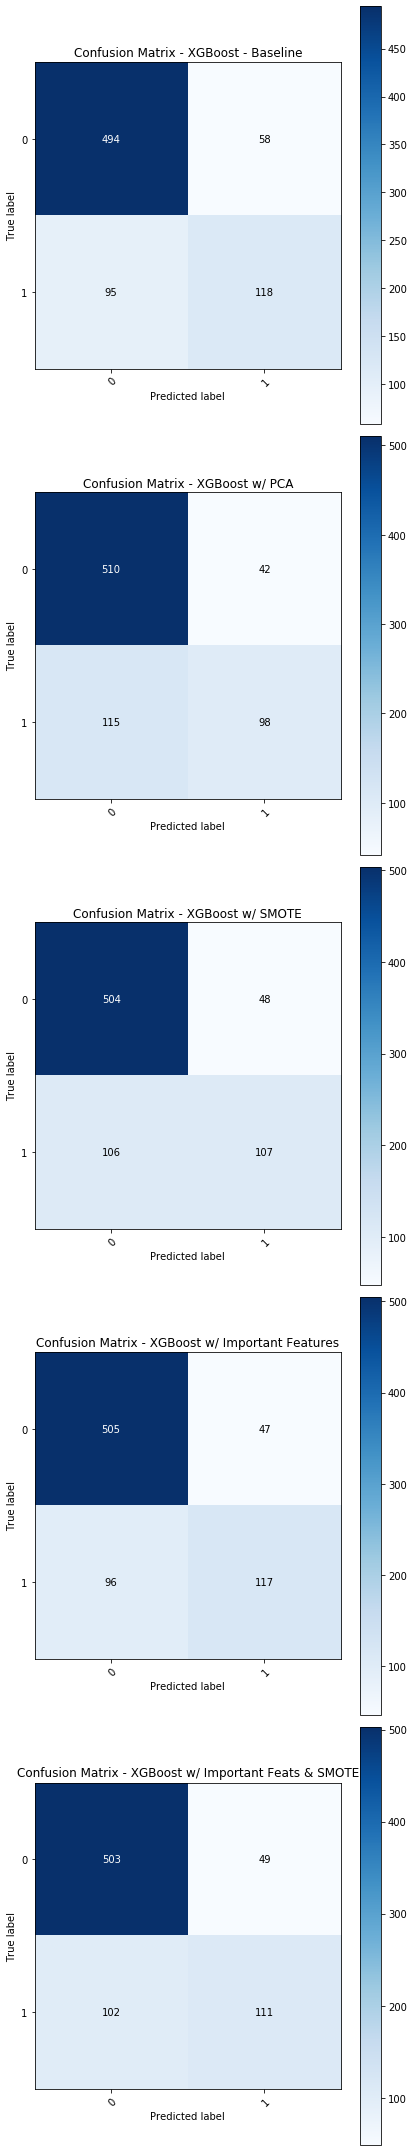

In [76]:
#plotting confusion matrices
fig, axes = plt.subplots(5, 1, figsize=(6,30))

pcm.plot_confusion_matrix(y_test.astype('int64'),
                          val_preds.astype('int64'),
                          title="Confusion Matrix - XGBoost - Baseline",
                          classes=np.array([0,1]),
                          figure=fig,
                          axis=axes[0])

pcm.plot_confusion_matrix(y_test.astype('int64'),
                          pca_val_preds.astype('int64'),
                          title="Confusion Matrix - XGBoost w/ PCA",
                          classes=np.array([0,1]),
                          figure=fig,
                          axis=axes[1])

pcm.plot_confusion_matrix(y_test.astype('int64'),
                          smote_val_preds.astype('int64'),
                          title="Confusion Matrix - XGBoost w/ SMOTE",
                          classes=np.array([0,1]),
                          figure=fig,
                          axis=axes[2])

pcm.plot_confusion_matrix(y_test.astype('int64'),
                          impt_val_preds.astype('int64'),
                          title="Confusion Matrix - XGBoost w/ Important Features",
                          classes=np.array([0,1]),
                          figure=fig,
                          axis=axes[3])

pcm.plot_confusion_matrix(y_test.astype('int64'),
                          impt_smote_val_preds.astype('int64'),
                          title="Confusion Matrix - XGBoost w/ Important Feats & SMOTE",
                          classes=np.array([0,1]),
                          figure=fig,
                          axis=axes[4])

# a bug in the current version of matplotlib shifts the default ylim,
# and the code below corrects it
axes[0].set_ylim(1.5, -0.5)
axes[1].set_ylim(1.5, -0.5)
axes[2].set_ylim(1.5, -0.5)
axes[3].set_ylim(1.5, -0.5)
axes[4].set_ylim(1.5, -0.5);